## 关于theta分布的观察

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import cufflinks 
cufflinks.set_config_file(offline_config=False)

In [24]:
rtn_arr = np.random.normal(size=100000)

asset_arr = list()
asset_arr.append(1)
for i,r in enumerate(rtn_arr):
    asset_arr.append(asset_arr[i] + (r * 0.01))


asset_df = pd.DataFrame({"asset_arr":asset_arr})

In [27]:
target_column="asset_arr"
asset_df['mean_20_'+target_column] = asset_df[[target_column]].ewm(span=20, adjust=False).mean()
asset_df['std_20_'+target_column] = asset_df[[target_column]].ewm(span=20, adjust=False).std()
asset_df[target_column] = asset_df[target_column]
asset_df.dropna(inplace=True)
# 计算偏离度 theta = (p - ma) / sigma
asset_df['theta_'+target_column] = (asset_df[target_column] - asset_df['mean_20_'+target_column]) / asset_df['std_20_'+target_column]

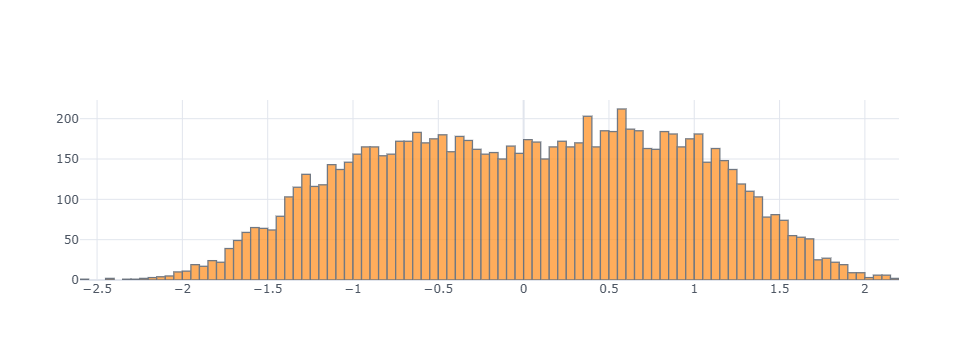

In [9]:
asset_df[['theta_asset_arr']].iplot(kind='hist')

In [14]:
asset_df["asset_arr"]

,asset_arr,mean_20_asset_arr,std_20_asset_arr,theta_asset_arr
1,0.997379,0.999750,0.001853,-1.279527
2,1.007147,1.000455,0.004093,1.635119
3,1.017554,1.002083,0.008356,1.851535
4,1.014237,1.003241,0.008722,1.260702
5,0.997300,1.002675,0.008064,-0.666547
...,...,...,...,...
9996,1.311714,1.292012,0.021447,0.918669
9997,1.304509,1.293202,0.020744,0.545082
9998,1.301370,1.293980,0.019885,0.371666
9999,1.298328,1.294394,0.018959,0.207479


In [35]:
# 计算未来均价
asset_df['mean_10_future'] = asset_df[['asset_arr']].ewm(span=10, adjust=False).mean().shift(-10)  # 首先计算均线，然后错位10个（也就是对应于未来的均价）
# 计算未来收益
asset_df['prospective_earnings_10_mean'] = (asset_df['mean_10_future'] - asset_df['asset_arr']) / asset_df['asset_arr']     
# 计算1天的未来收益
asset_df['rtn'] = (asset_df['asset_arr'].shift(-1) - asset_df['asset_arr']) / asset_df['asset_arr']     

In [36]:
asset_df["rtn"].std()

0.009873100456251156

In [37]:
asset_df["prospective_earnings_10_mean"].std()

0.02046316777272875

In [38]:
asset_df["rtn"].std()/asset_df["prospective_earnings_10_mean"].std()

0.4824815280754835

In [52]:
def cal_std(size):
    rtn_arr = np.random.normal(size=size)

    asset_arr = list()
    asset_arr.append(1)
    for i,r in enumerate(rtn_arr):
        asset_arr.append(asset_arr[i] + (r * 0.01))


    asset_df = pd.DataFrame({"asset_arr":asset_arr})
    print(asset_df.std()[0])

In [54]:
for i in range(8):
    size = 10**i
    cal_std(size)

0.006345413840544479
0.0113988485570167
0.03697729365580409
0.15135499893835508
0.7808275129366689
1.3365443493351405
4.778441100305314
14.051559216944936


In [63]:
rtn_arr = np.random.normal(size=1000)

asset_arr = list()
asset_arr.append(1)
for i,r in enumerate(rtn_arr):
    asset_arr.append(asset_arr[i] + (r * 0.01))


asset_df = pd.DataFrame({"asset_arr":asset_arr})

In [64]:
rtn_arr_b = np.random.normal(size=1000)

asset_arr = list()
asset_arr.append(1)
for i,r in enumerate(rtn_arr_b):
    asset_arr.append(asset_arr[i] + (r * 0.01))

In [65]:
asset_df["asset_b"] = asset_arr

In [66]:
asset_df['rtn_a'] = (asset_df['asset_arr'].shift(-1) - asset_df['asset_arr']) / asset_df['asset_arr']     
asset_df['rtn_b'] = (asset_df['asset_b'].shift(-1) - asset_df['asset_b']) / asset_df['asset_b']     

In [69]:
asset_df[['rtn_a', 'rtn_b']].corr().iloc[0,1]

0.008415996040596355

In [70]:
asset_x = pd.concat([asset_df, asset_df])

In [71]:
asset_x[['rtn_a', 'rtn_b']].corr().iloc[0,1]

0.008415996040596372